In [2]:
# 导入一些需要用到的包
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 配置 pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

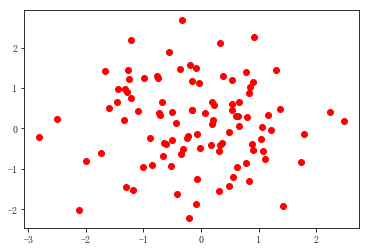

In [2]:
#两组来自正态分布的随机数的散点图
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

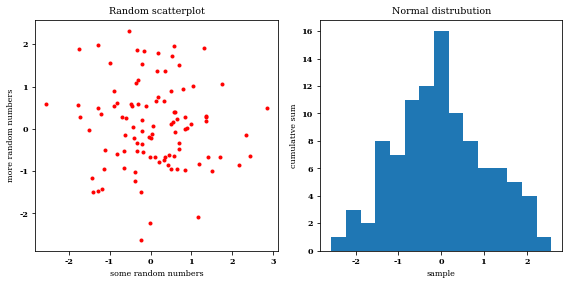

In [7]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    # 定义一个画布:长:8英寸 宽:4英寸
    fig = plt.figure(figsize=(8,4))
    # 将画布分为1行2列，从左到右从上到下取第1块
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    # 散点图
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    # 画布的第2块
    ax2 = fig.add_subplot(122)
    # 直方图
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    #plt.savefig("normalvars.png", dpi=150)

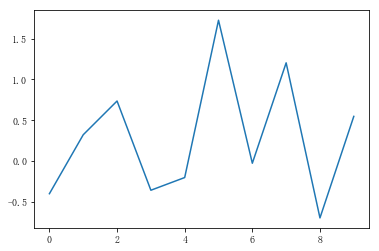

In [8]:
# pandas绘图
normals = pd.Series(np.random.normal(size=10))
normals.plot()

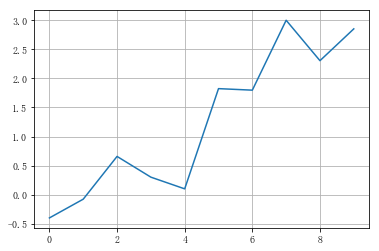

In [9]:
normals.cumsum().plot(grid=True)

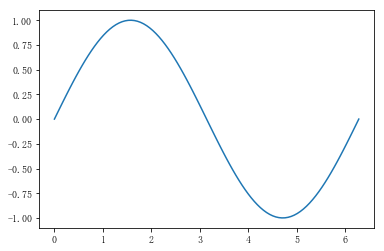

In [11]:
# 正弦曲线
x = np.linspace(0,2*np.pi,100)      # 从0 到 2π  取100份
y = np.sin(x)                       # y 为sin(x) 的值
s = pd.Series(data=y,index=x)          # 构建一个Series对象
s.plot()                  # 使用Series的plot()方法

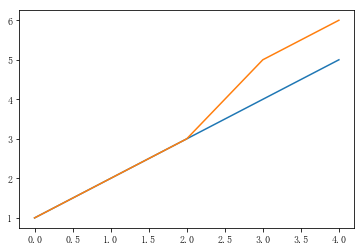

In [12]:
# 两条线叠加
pd.Series([1, 2, 3, 4, 5]).plot()
pd.Series([1, 2, 3, 5, 6]).plot()

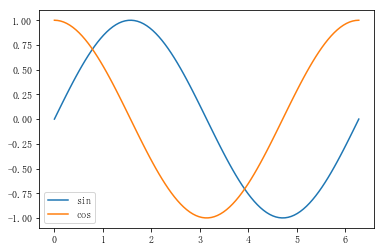

In [14]:
#从0 到 2π  取100份
x = np.linspace(0,2*np.pi,100)
#创建DataFrame对象
df = pd.DataFrame(data={'sin':np.sin(x),'cos':np.cos(x)},index=x) 
df.plot()

       normal       gamma  poisson
0   -0.706146    1.859700      0.0
1   -0.473737    2.062762      0.0
2   -0.968646    3.257303      3.0
3   -0.794565    7.562273      4.0
4   -0.273882    8.002607      6.0
5   -1.826003    8.770512      6.0
6   -2.856161    9.519983      9.0
7   -2.751859   13.459497     10.0
8   -4.793402   13.910352     10.0
9   -4.941094   14.360341     11.0
10  -5.242629   14.674372     11.0
11  -6.432606   15.868703     11.0
..        ...         ...      ...
88  12.211523   90.647263     77.0
89  11.869143   91.614983     79.0
90  11.589501   91.864037     80.0
91  11.215665   93.284326     81.0
92  10.405075   95.997309     82.0
93  10.484780   96.292562     85.0
94  11.360651   96.899486     86.0
95   9.513151   97.358396     86.0
96   9.876354   98.421155     87.0
97   8.984089   99.015079     87.0
98  10.582879  100.518539     87.0
99   9.213253  100.989336     88.0

[100 rows x 3 columns]


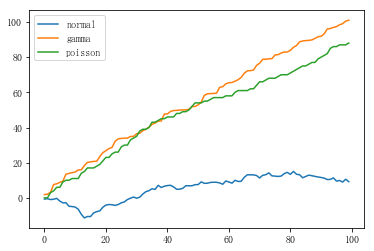

In [7]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
print(variables.cumsum(0))
variables.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff464b9ac88>,
      dtype=object)

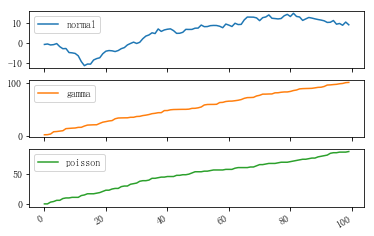

In [8]:
#利用参数“subplots”绘制 DataFrame 中每个序列对应的子图
variables.cumsum(0).plot(subplots=True)

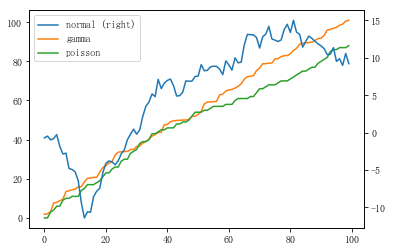

In [9]:
#绘制双坐标轴，将某些序列用次坐标轴展示，这样可以展示更多细节并且图像中没有过多空白
variables.cumsum(0).plot(secondary_y='normal')

Text(0, 0.5, 'cumulative sum')

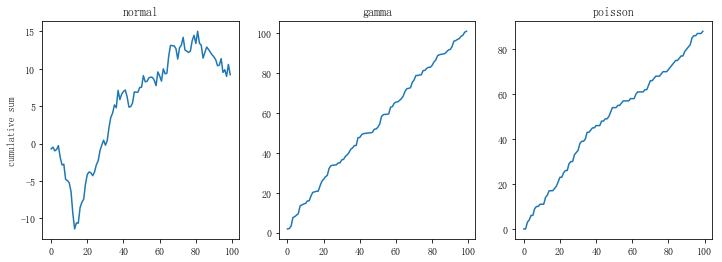

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

In [11]:
#泰坦尼克数据集
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

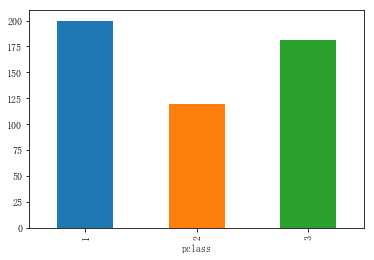

In [12]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

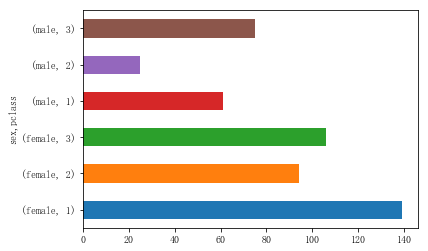

In [13]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

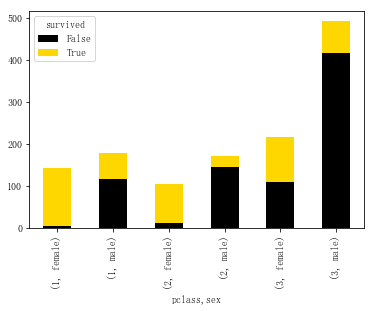

In [14]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

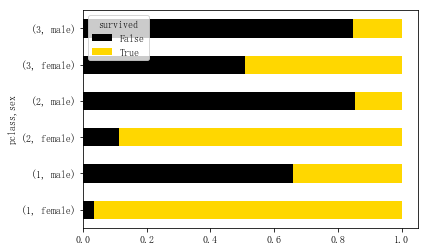

In [16]:
# 除以该组的总人数来对比不同组之间的存活率
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

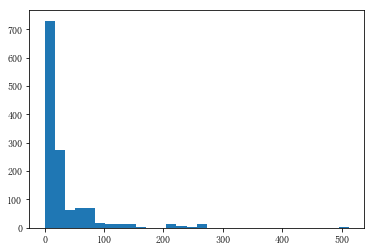

In [18]:
# 泰坦尼克船票价格的分布情况
titanic.fare.hist(bins=30, grid=False)

In [19]:
# 计算最优区间个数的算法(会一定程度的随观测值个数变化)
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

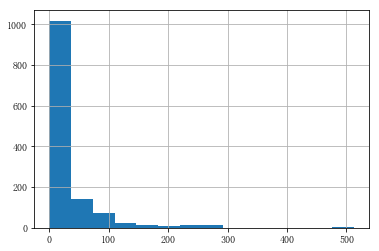

In [20]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

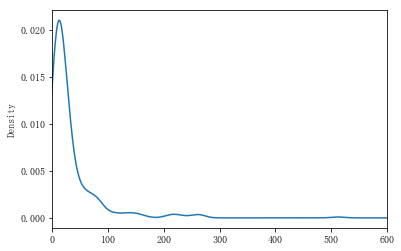

In [21]:
# 密度图
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


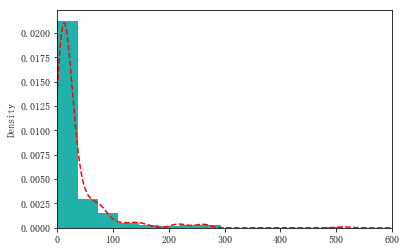

In [22]:
# 直方图 + 密度图
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

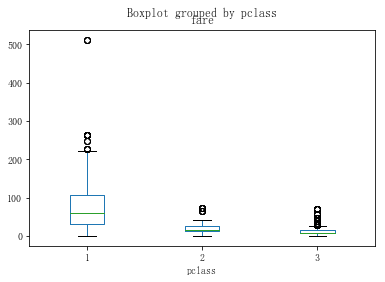

In [23]:
titanic.boxplot(column='fare', by='pclass', grid=False)

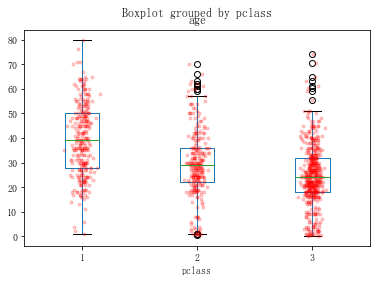

In [24]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # 通过设置随机值，使观测值在x轴方向不重叠
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

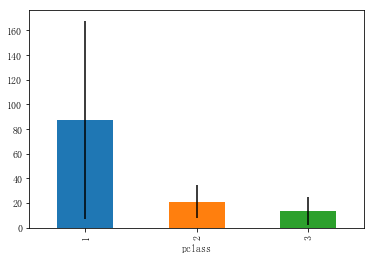

In [25]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

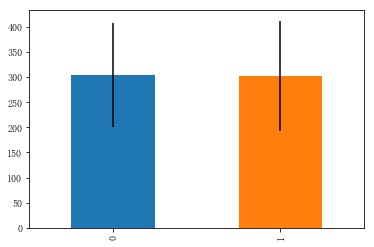

In [26]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

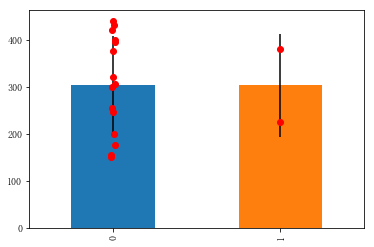

In [27]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

In [28]:
# 棒球数据集
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...   rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...   2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...   0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...   0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...   0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...   0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

(0, 200)

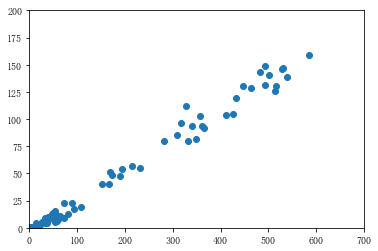

In [29]:
# 在探索变量之间的关系=时，可以绘制散点图。
# Series 或者 DataFrame 结构的数据并没有相应的绘制散点图的方法，必须使用 matplotlib 的“scatter”函数。
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700); plt.ylim(0, 200)

(0, 200)

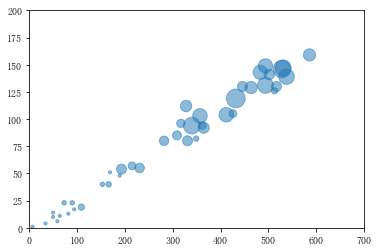

In [30]:
# 赋予样本点不同的大小和颜色来展示更多的信息
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

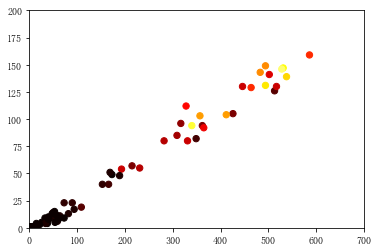

In [31]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


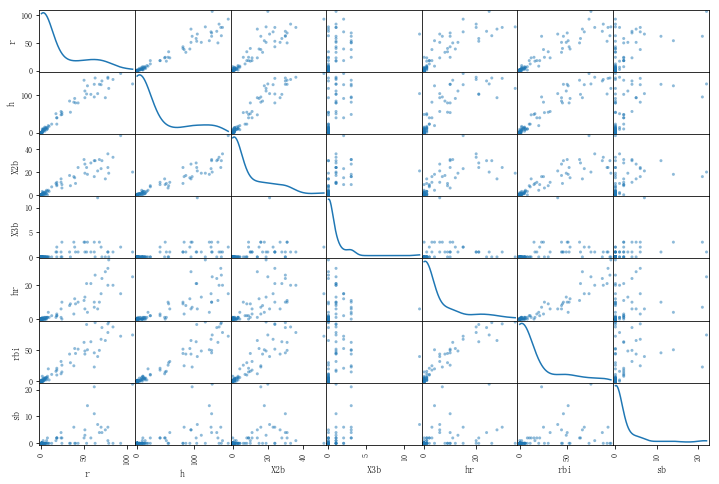

In [32]:
# 使用“scatter_matrix”函数同时展示多个变量之间的散点图，最终会生成一个两两对应的散点图矩阵，可以选择在对角线展示直方图或者密度图。
_ = pd.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')